# Description:
The gbsg data set contains patient records from a 1984-1989 trial conducted by the German Breast Cancer Study Group (GBSG) of 720 patients with node positive breast cancer; it retains the 686 patients with complete data for the prognostic variables.

# Dataset Information:
1.pid:patient identifier

2.age:age,in years

3.meno:menopausal status (0= premenopausal, 1= postmenopausal)

4.size:tumor size,in mm

5.grade:tumor grade

6.nodes:number of positive lymph nodes

7.pgr:progesterone receptors (fmol/l)

8.er:estrogen receptors (fmol/l)

9.hormon:hormonal therapy, 0= no, 1= yes

10.rfstime:recurrence free survival time; days to first of reccurence, death or last follow-up

11.status:0= alive without recurrence, 1= recurrence or death

# Problem Statement:
The objective of the GBSG dataset is to predict tumor size. The datasets of several predictor (independent) variables and one target variable (tumor size)

# Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv('gbsg.csv')

# Exploratory Data Analysis

# understanding Variables
     1)Head of the dataset
     2)The shape of the dataset
     3)List types of all columns
     4)Info of the dataset
     5)Summary of the dataset

In [3]:
#head of the dataset
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [4]:
#tail of the dataset
df.tail()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0
685,686,894,80,1,7,2,7,2380,972,1,758,0


In [5]:
#the shape of the dataset
df.shape

(686, 12)

In [6]:
#List types of all columns
df.columns

Index(['Unnamed: 0', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [8]:
# Statistical summary
df.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


# Data Cleaning

# Check the Null Values

In [9]:
df.isnull().sum()

Unnamed: 0    0
pid           0
age           0
meno          0
size          0
grade         0
nodes         0
pgr           0
er            0
hormon        0
rfstime       0
status        0
dtype: int64

# Check the duplicates

In [10]:
df.duplicated().sum()

0

# Data Visualization
 Histograms

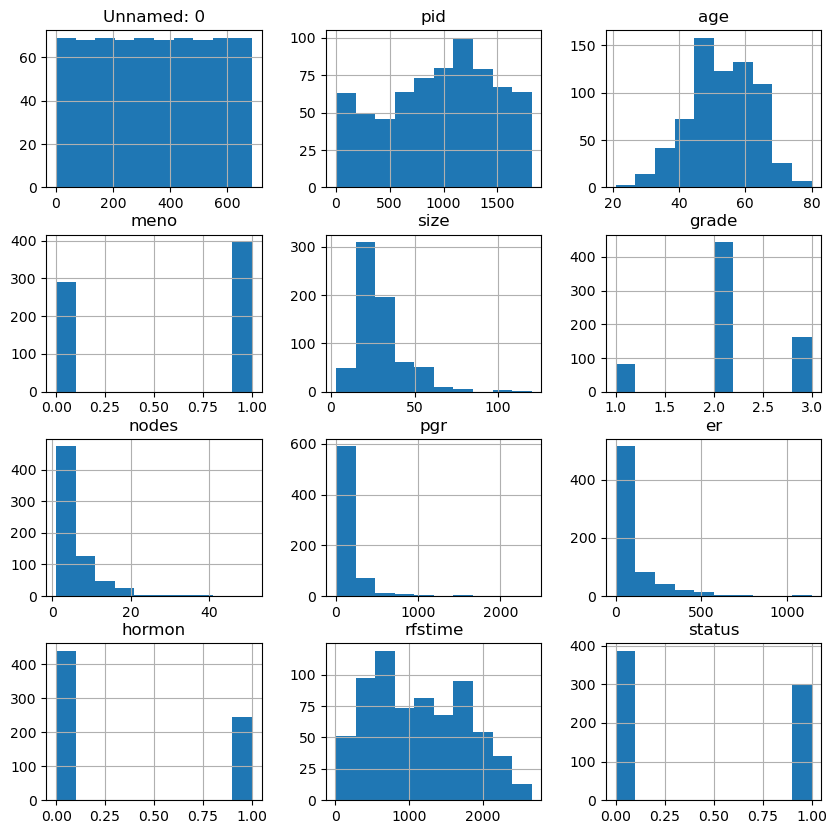

In [11]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='size', ylabel='Density'>

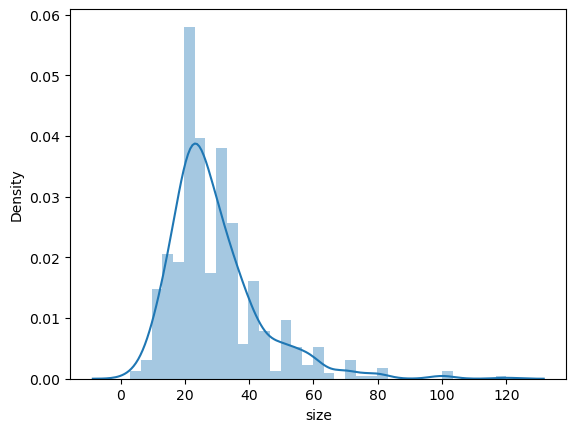

In [12]:
sns.distplot(df['size'])

## Will use Log Transformation for charges to convert right skewed into normal distribution

<Axes: xlabel='size', ylabel='Density'>

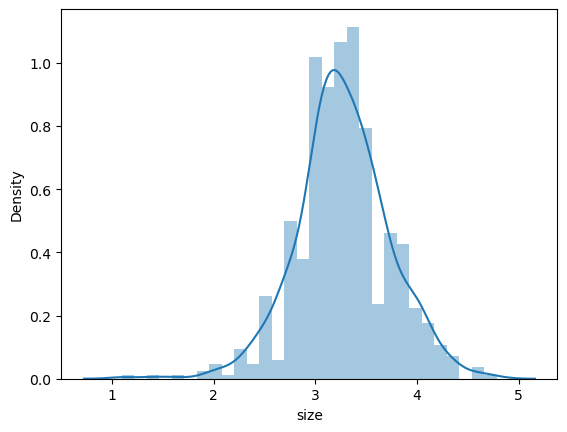

In [13]:
sns.distplot(np.log(df['size']))

In [14]:
new_df=df.copy()

In [15]:
new_df['size']=np.log(df['size'])

In [16]:
new_df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2.890372,2,2,0,0,0,1838,0
1,2,1575,55,1,2.995732,3,16,0,0,0,403,1
2,3,1140,56,1,3.688879,3,3,0,0,0,1603,0
3,4,769,45,0,3.218876,3,1,0,4,0,177,0
4,5,130,65,1,3.401197,2,5,0,36,1,1855,0


# Scatter plot

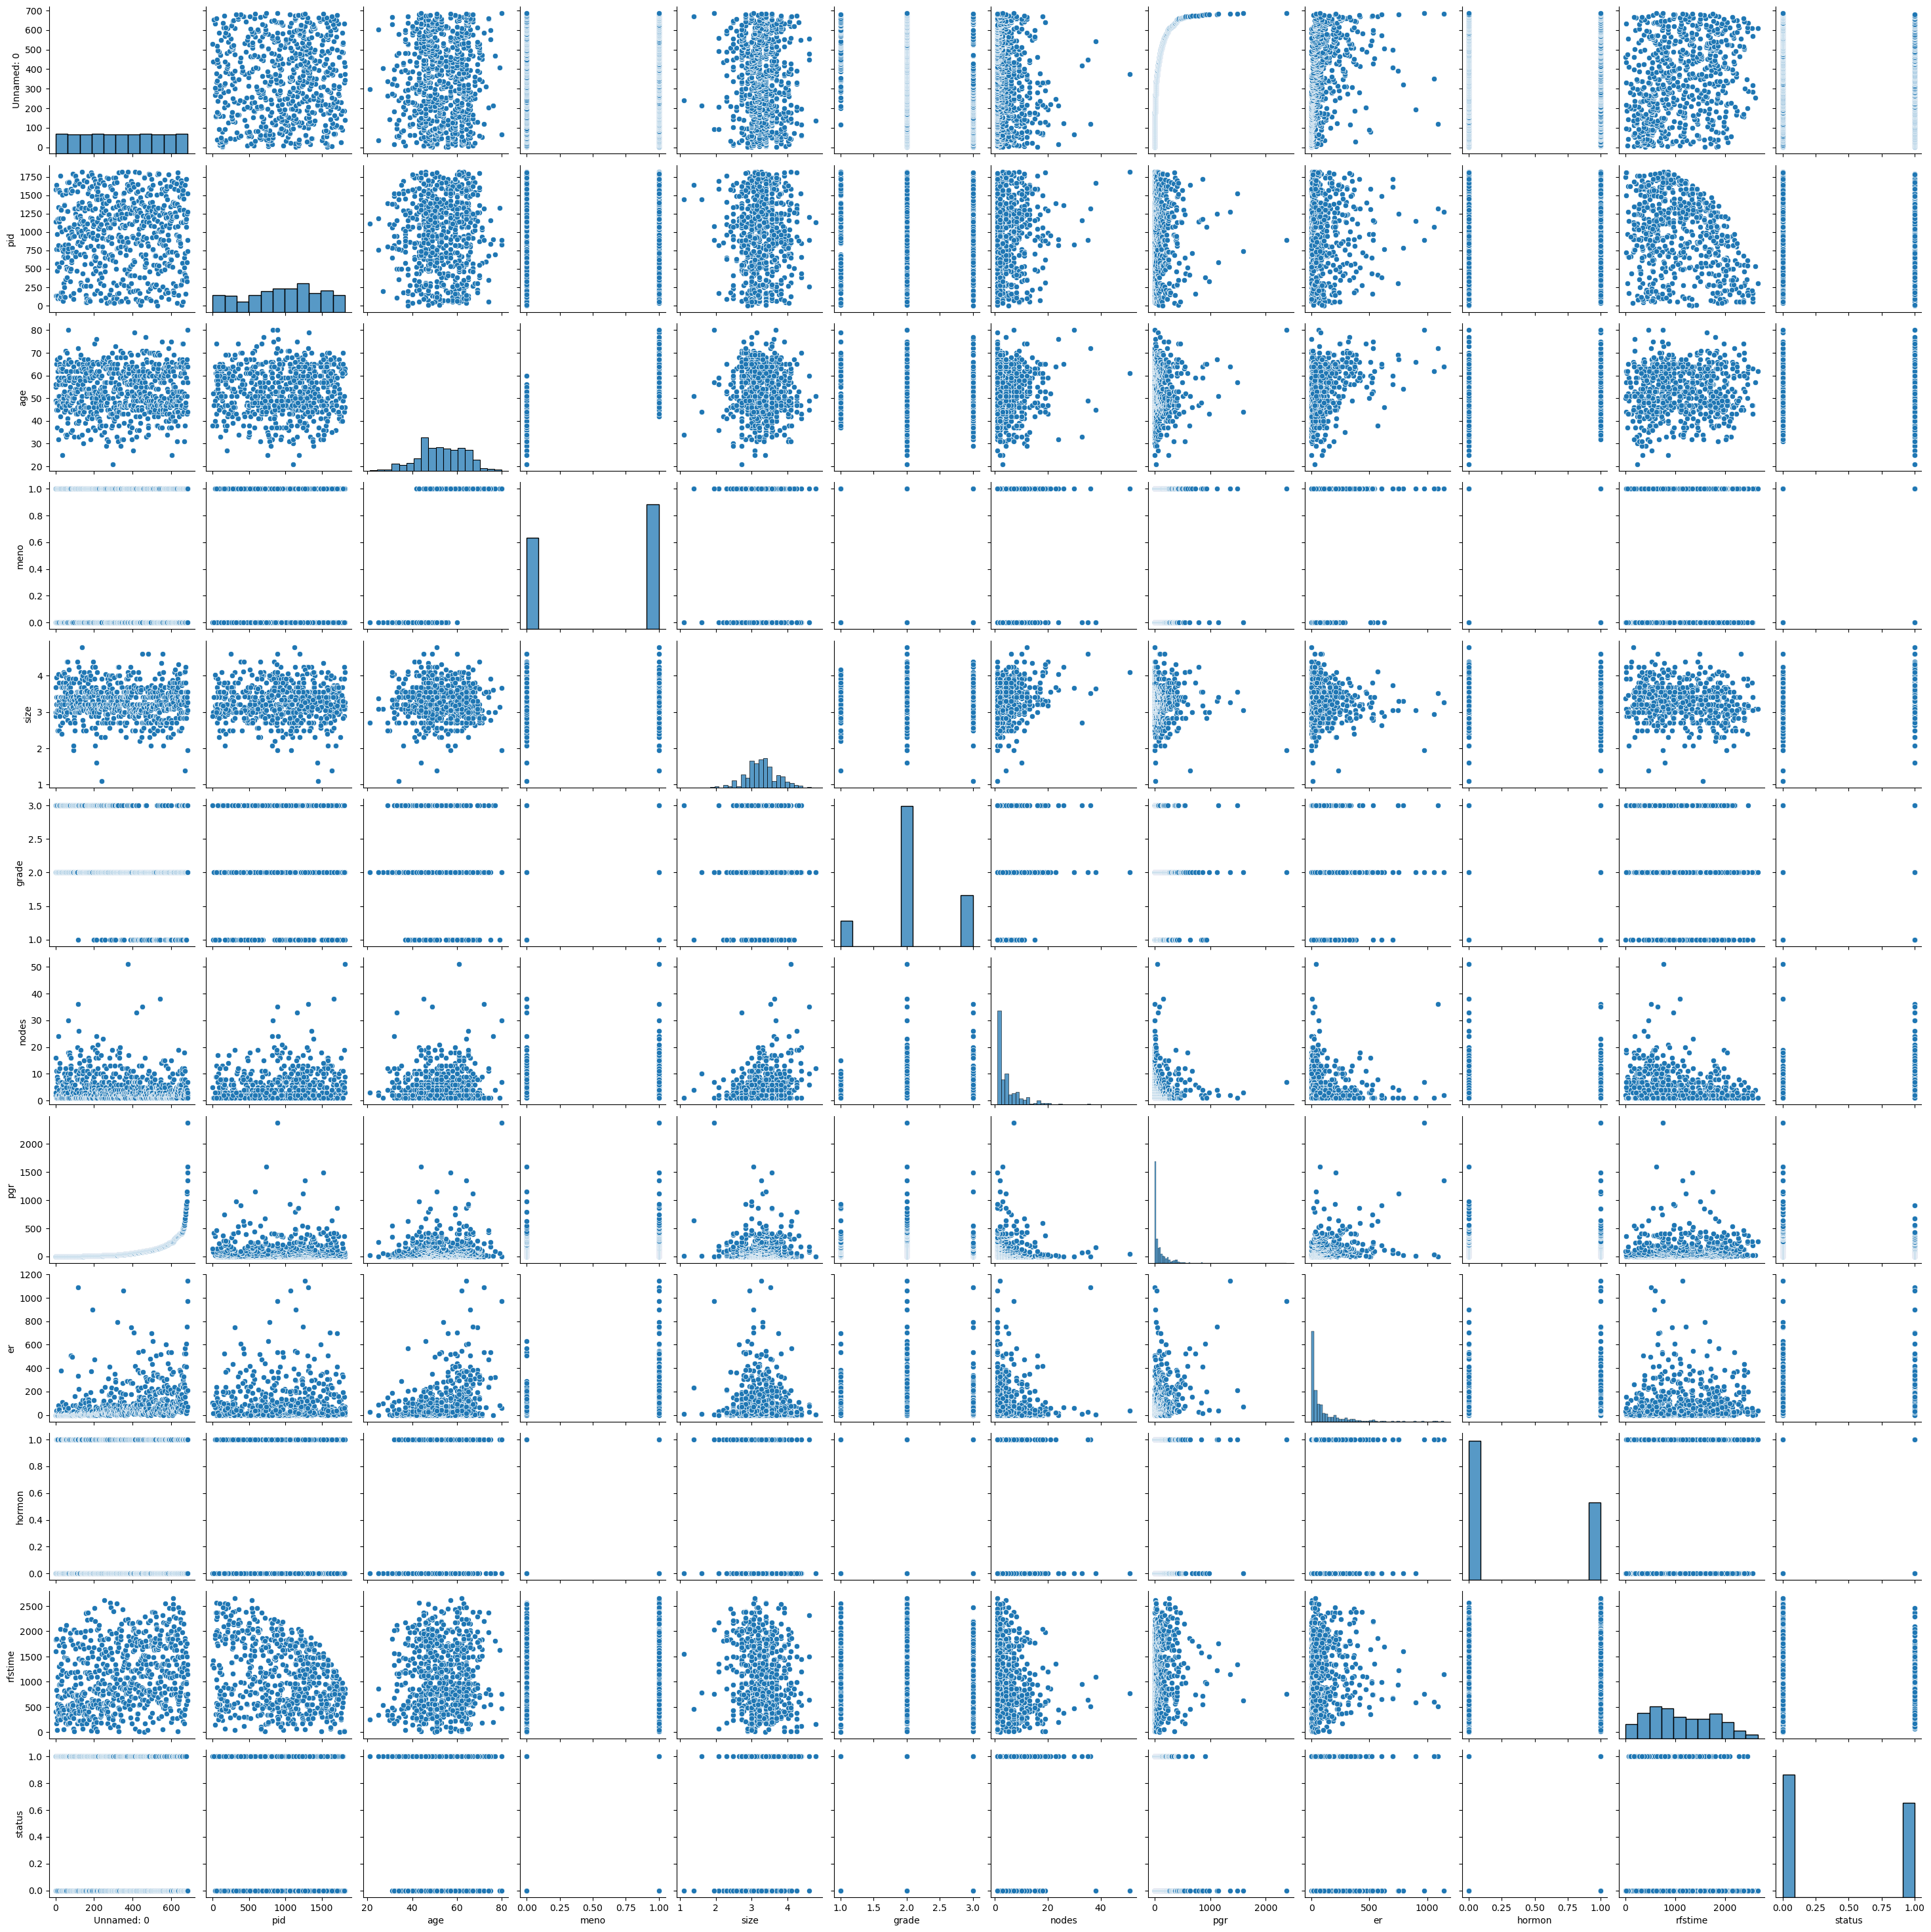

In [17]:
sns.pairplot(new_df)

# Effect of age on size of tumor

# Progesterone Receptors (fmol/l) at different Ages

Progesterone receptors (PRs) are a type of nuclear receptor protein found in cells that bind to the hormone progesterone. Progesterone is a female sex hormone that plays a key role in the menstrual cycle, pregnancy, and embryonic development. PRs are expressed in a variety of tissues, including the uterus, breast, ovaries, and brain.

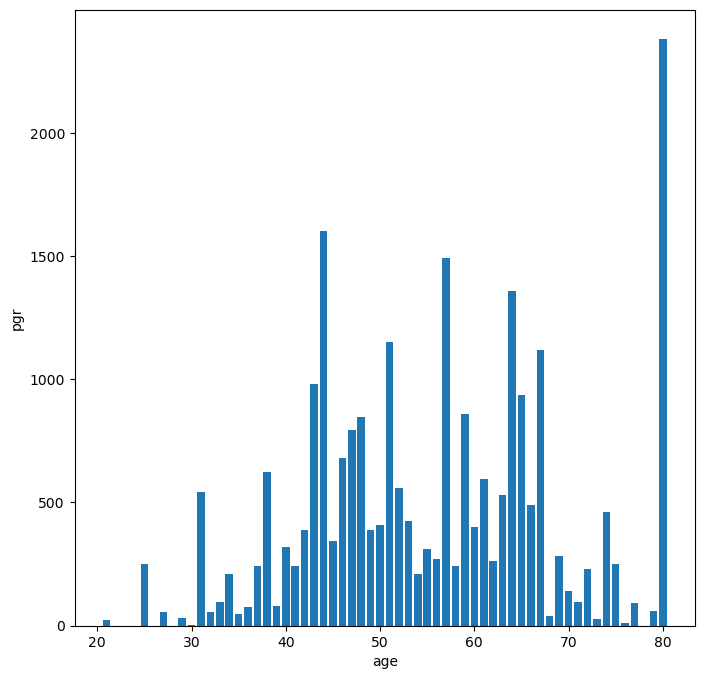

In [18]:
plt.figure(figsize=(8,8))
plt.bar('age','pgr', data=df)
plt.xlabel('age')
plt.ylabel('pgr')
plt.show()

# Estrogen Receptors (fmol/l) at different Ages

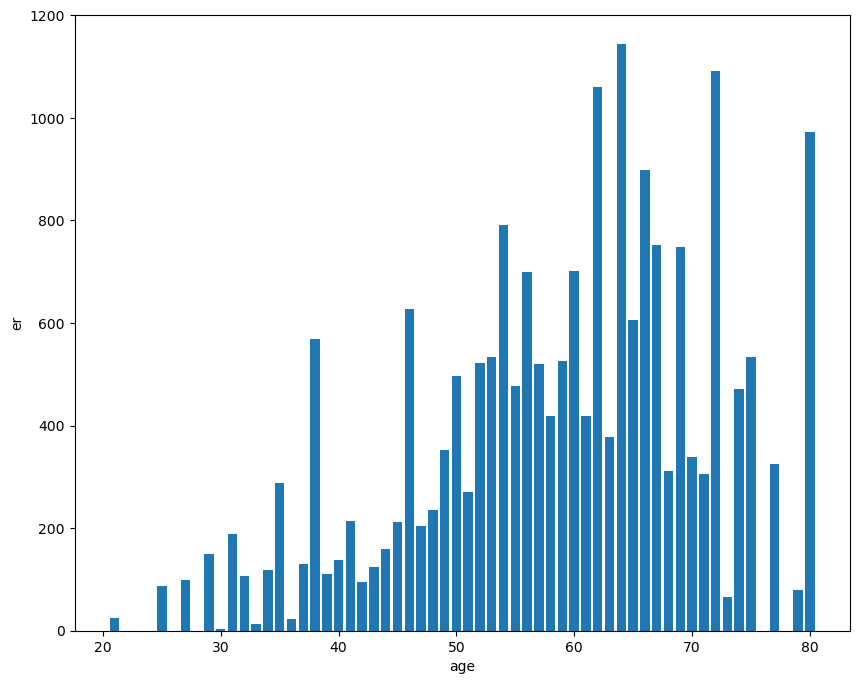

In [19]:
plt.figure(figsize=(10,8))
plt.bar('age','er', data=df)
plt.xlabel('age')
plt.ylabel('er')
plt.show()

# Effect of age on the tumor size.

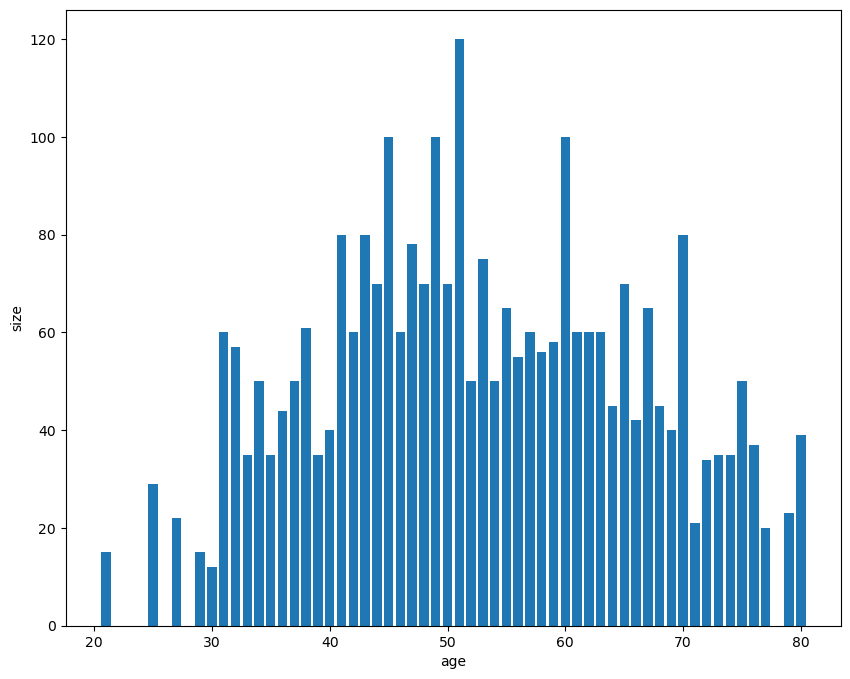

In [20]:
plt.figure(figsize=(10,8))
plt.bar('age','size', data=df)
plt.xlabel('age')
plt.ylabel('size')
plt.show()

# Effect of Menopausal Status on Size of Tumor
(0= premenopausal, 1= postmenopausal)

Menopausal status refers to a woman's current stage of menopause, which can be determined by a number of factors, including menstrual history, hormone levels, and symptoms

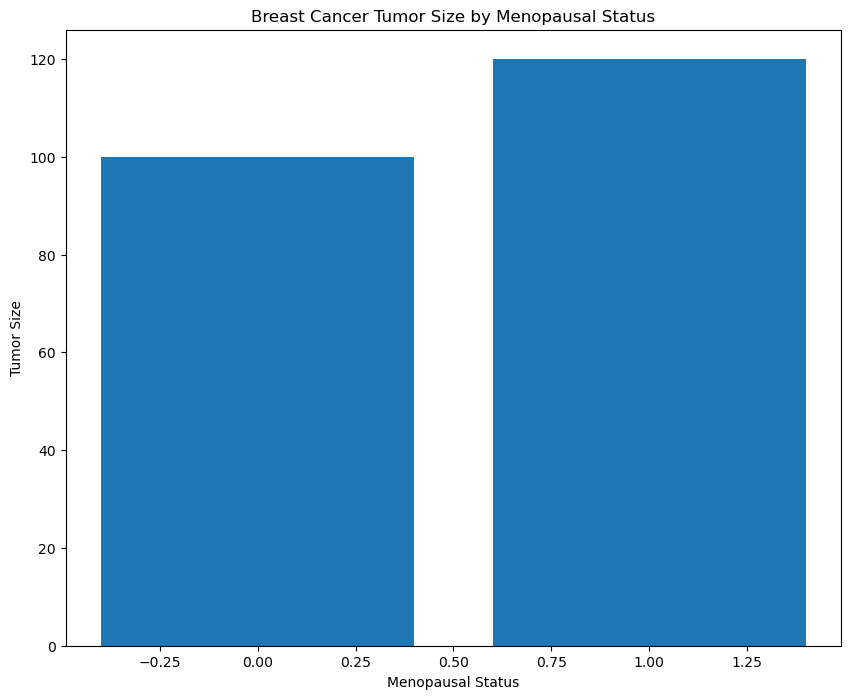

In [21]:
plt.figure(figsize=(10,8))
plt.bar('meno','size', data=df)
plt.title('Breast Cancer Tumor Size by Menopausal Status')
plt.xlabel('Menopausal Status')
plt.ylabel('Tumor Size')
plt.show()

# Distribution of Tumor Grade

Tumor grade refers to the degree of abnormality or differentiation of cancer cells compared to normal cells, and is a key factor in determining the aggressiveness of a tumor.

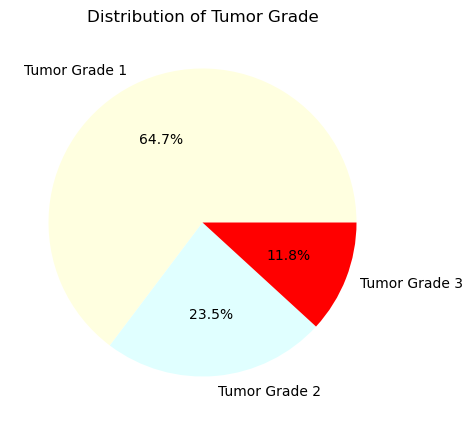

In [22]:
plt.figure(figsize=(5,5))
df_grade=df['grade'].value_counts()
labels = ['Tumor Grade 1', 'Tumor Grade 2','Tumor Grade 3']
plt.pie(df_grade, labels=labels, autopct='%1.1f%%',colors=['lightyellow', 'lightcyan','red'])
plt.title('Distribution of Tumor Grade')
plt.show()

# Distribution of Patient Status

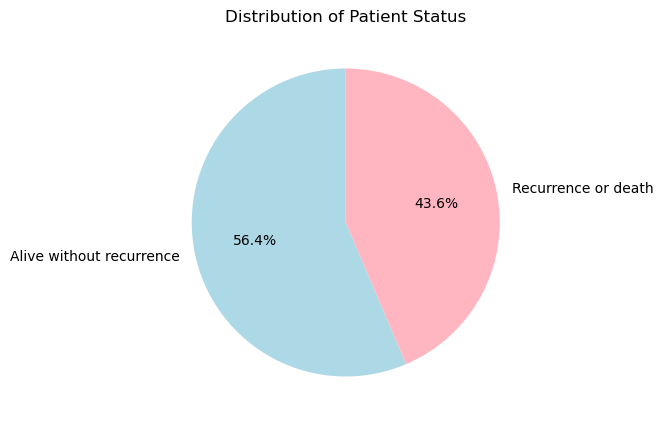

In [23]:
plt.figure(figsize=(5,5))
df_pie= df['status'].value_counts()
labels = ['Alive without recurrence', 'Recurrence or death']
plt.pie(df_pie, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Patient Status')
plt.show()

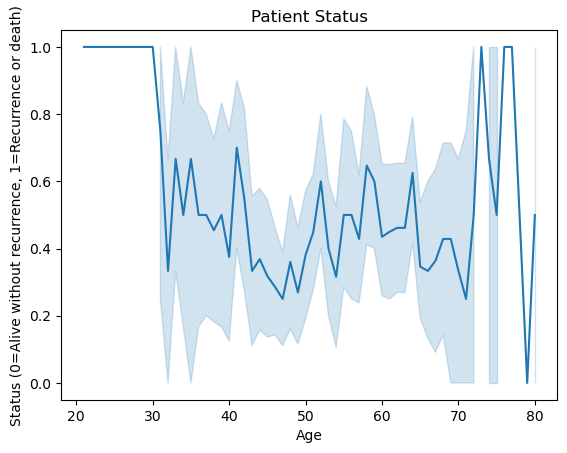

In [24]:
sns.lineplot(x='age', y='status', data=df)
plt.title('Patient Status')
plt.xlabel('Age')
plt.ylabel('Status (0=Alive without recurrence, 1=Recurrence or death)')
plt.show()

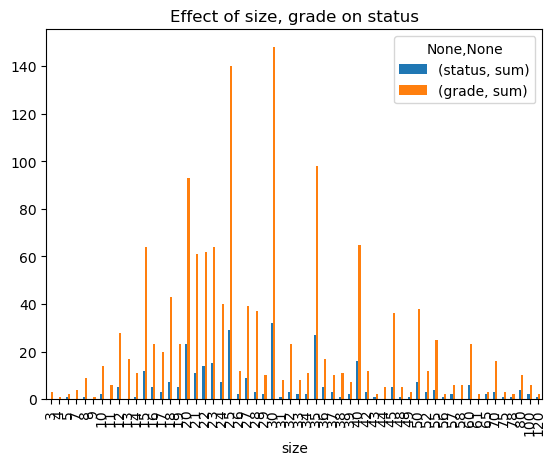

In [25]:
df.groupby('size')['status','grade'].agg(['sum']).plot.bar()
plt.title('Effect of size, grade on status')
plt.rcParams['figure.figsize']= [50,50]
plt.show()

Effect of Age on Grade and Size

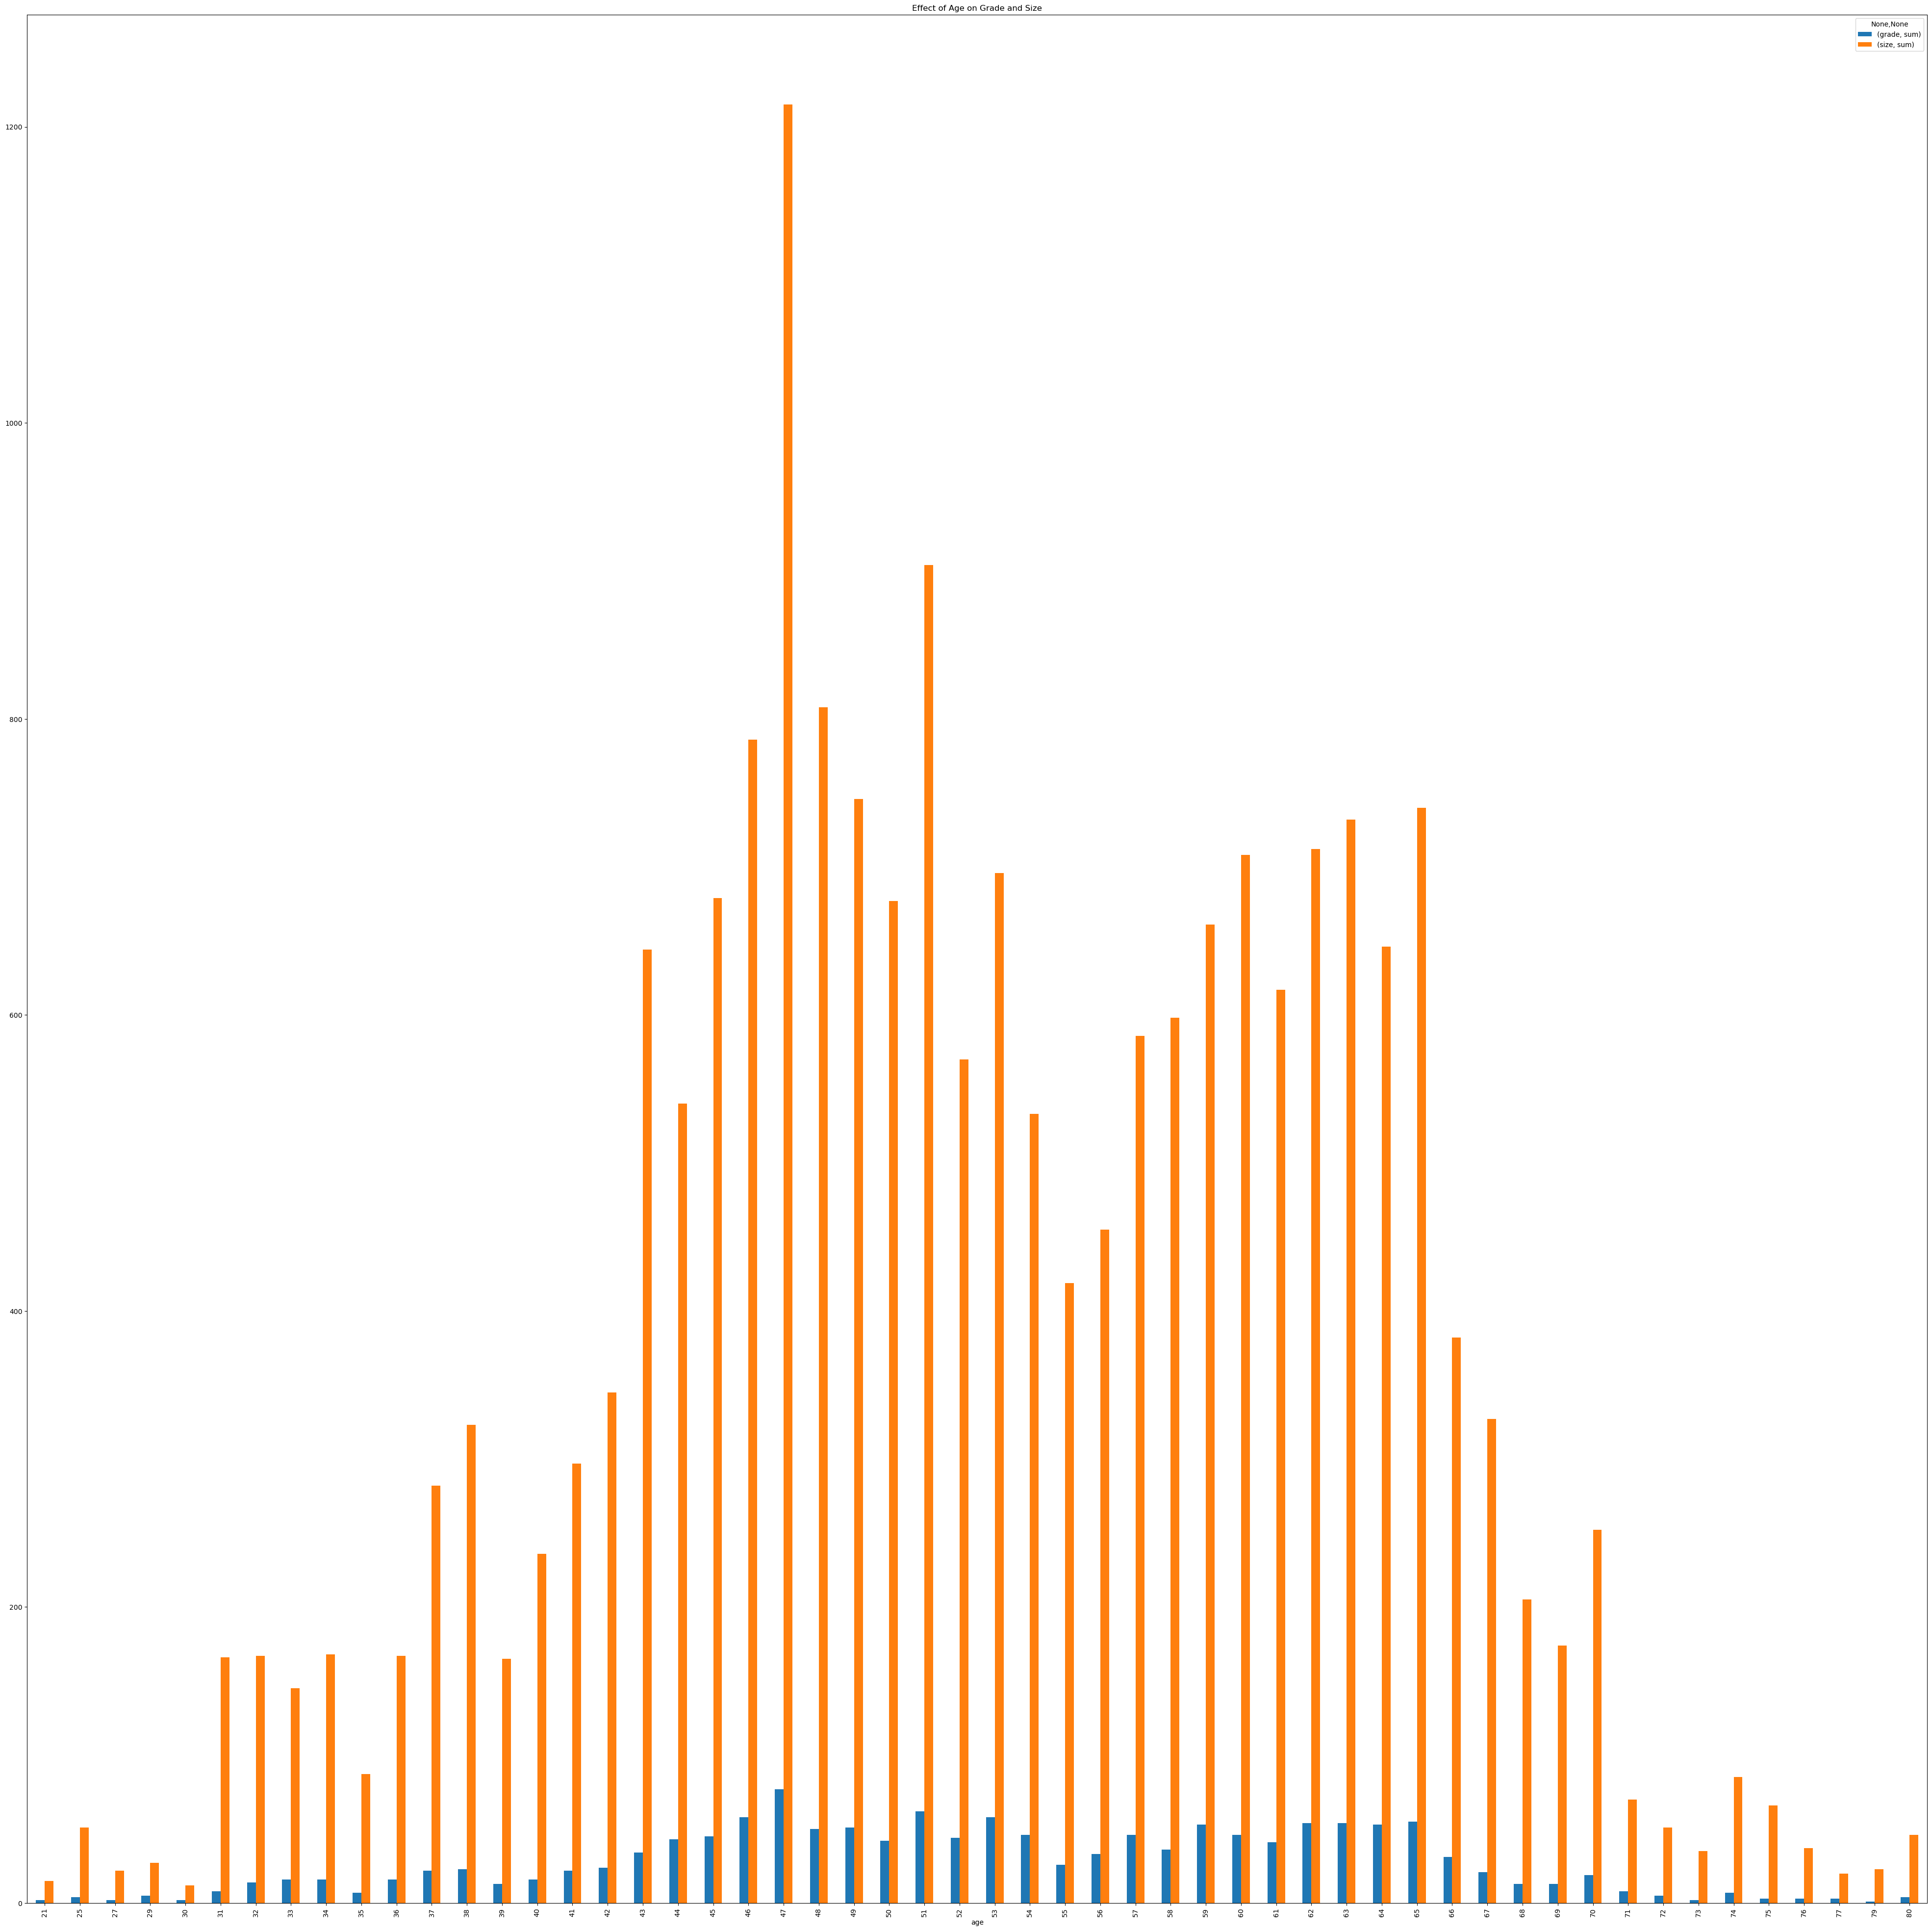

In [26]:
df.groupby('age')['grade','size'].agg(['sum']).plot.bar()
plt.title('Effect of Age on Grade and Size')
plt.rcParams['figure.figsize']= [15,15]
plt.show()

# Frequency as per age

47    36
51    29
46    28
62    26
63    26
49    26
65    26
48    25
59    25
53    25
64    24
60    23
45    22
57    21
50    21
52    20
61    20
44    19
54    19
43    18
58    17
56    16
66    15
55    14
67    11
38    11
42    11
41    10
37    10
70     9
40     8
68     7
69     7
33     6
39     6
34     6
36     6
32     6
31     4
71     4
35     3
74     3
72     2
80     2
29     2
25     2
75     2
30     1
76     1
21     1
73     1
27     1
79     1
77     1
Name: age, dtype: int64


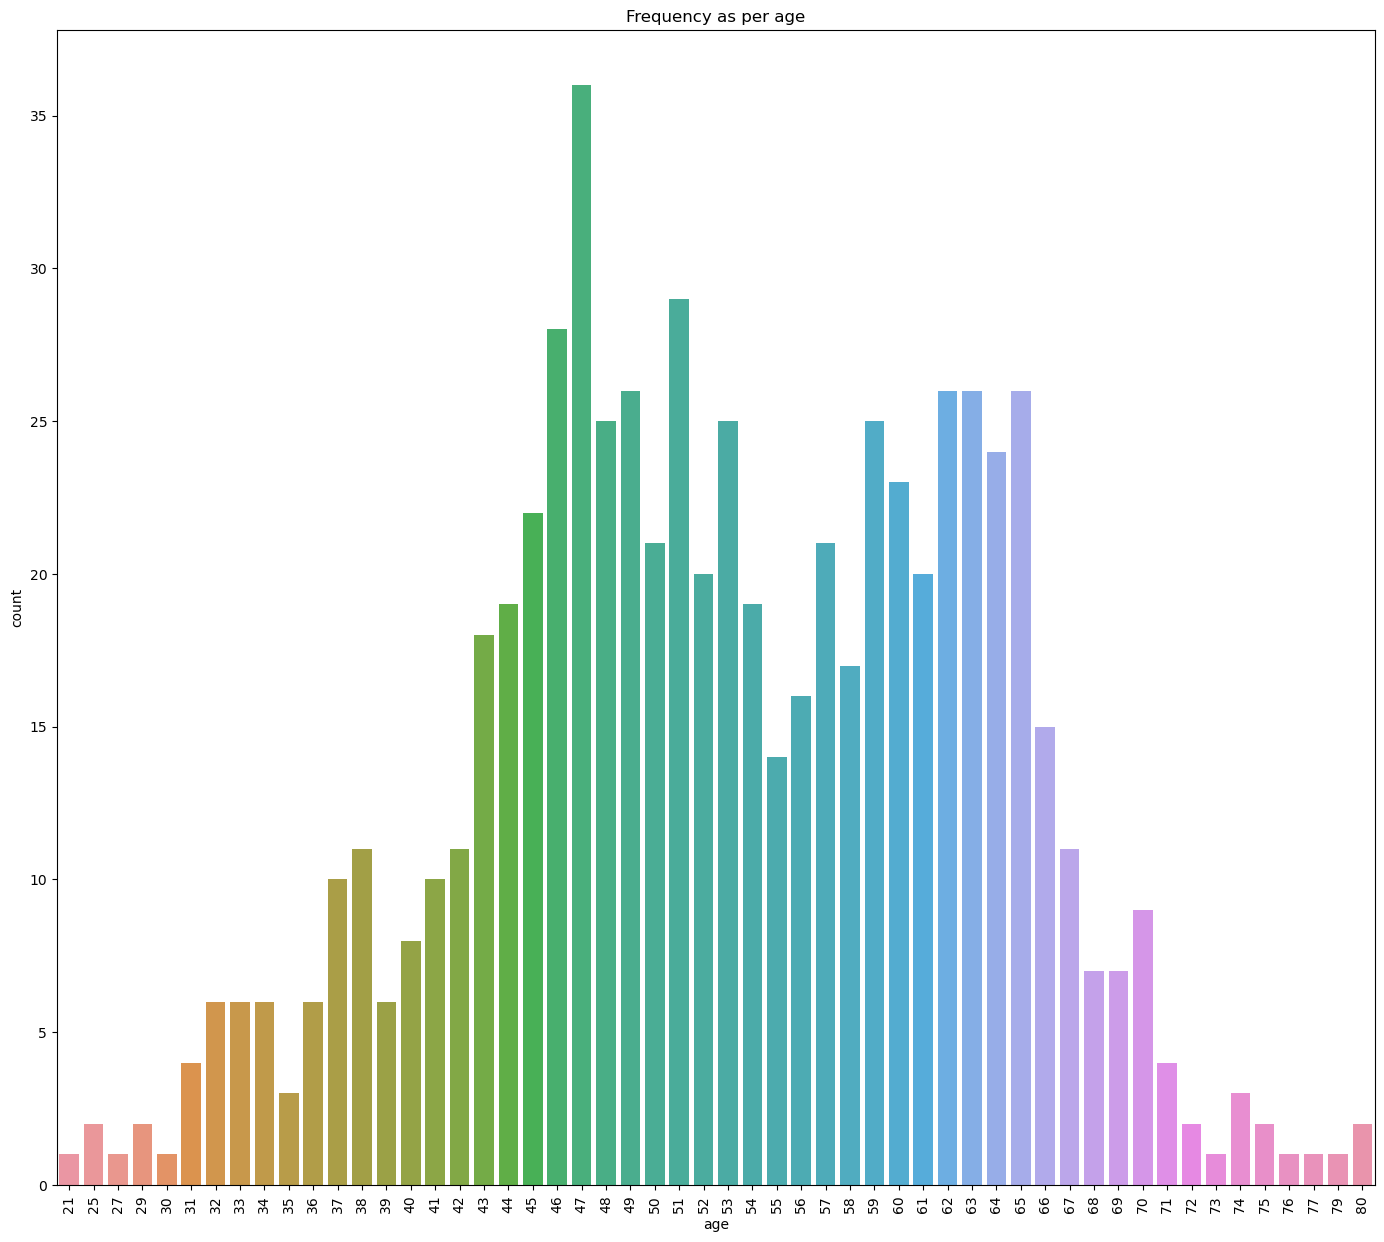

In [27]:
print(df['age'].value_counts())
plt.figure(figsize=(17,15))
sns.countplot(x=df['age'])
plt.title('Frequency as per age')
plt.xticks(rotation=90)
plt.show()

# Patient Status

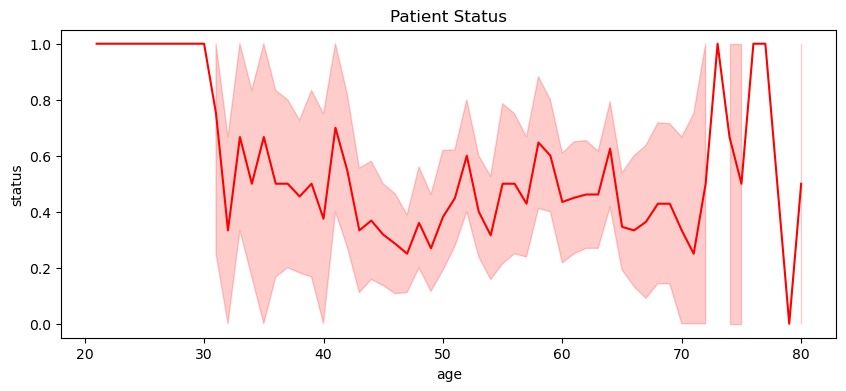

In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(x='age', y='status', data=df, color='red')
plt.title('Patient Status')
plt.show()

# Nodes status as per Age

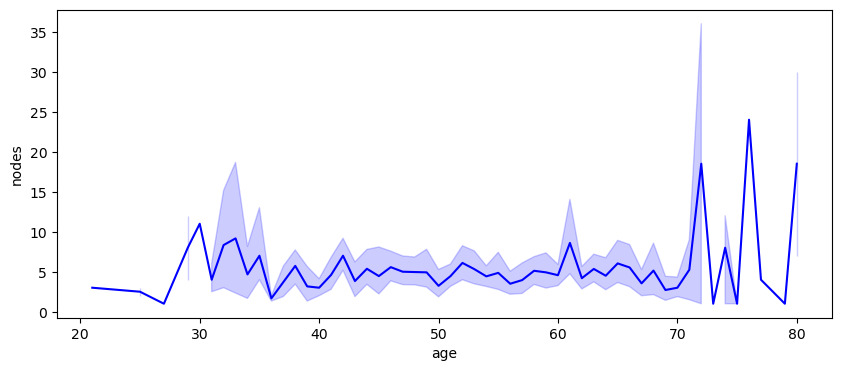

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(x='age', y='nodes', data=df, color='blue')
plt.show()

# To solve a regression problem, which involves predicting a continuous numerical value, you can follow these general steps:

1.Understand the problem.

2.Collect and preprocess the data.

3.Feature engineering.

4.Split the data.

5.Select a regression algorithm.

6.Train the regression model.

7.Evaluate the model.

8.Fine-tune the mode.

9.Make predictions.

10.Monitor and update.



understanding the problem ,collection and preprocessing the data is already observed

# 3.Feature engineering.

In [30]:
df2 = pd.get_dummies(new_df,drop_first=True)

In [31]:
df2.shape

(686, 12)

# 4.Split the data.

In [32]:
# Separate object for target feature 
y = df2['size']

# Separate object for Predictors 
X = df.drop('size',axis=1)

In [33]:
X.head()

,Unnamed: 0,pid,age,meno,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2,2,0,0,0,1838,0
1,2,1575,55,1,3,16,0,0,0,403,1
2,3,1140,56,1,3,3,0,0,0,1603,0
3,4,769,45,0,3,1,0,4,0,177,0
4,5,130,65,1,2,5,0,36,1,1855,0


In [34]:
y.head()

0    2.890372
1    2.995732
2    3.688879
3    3.218876
4    3.401197
Name: size, dtype: float64

In [35]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (686, 11) 
y Shape = (686,)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
X_train.shape,y_train.shape

((548, 11), (548,))

In [38]:
y_train.shape,y_test.shape

((548,), (138,))

# 5.Select a regression algorithm.

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [40]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.10018724799019663


In [41]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.07289900003627237


In [42]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.32254391116184616
Mean Squared Error = 0.18069400251528864
Root Mean Squared Error = 0.4250811716781733


In [43]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 19.524374454950486


In [44]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [1.00019566 1.00001416 1.00052169 0.99894752 1.05500376 1.02268118
 0.99981372 0.99987876 1.00531297 0.99998372 1.03272515]


In [45]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
482,32.0,24.102562,7.897438
23,30.0,27.105588,2.894412
189,13.0,27.459536,-14.459536
47,18.0,25.973347,-7.973347
363,30.0,29.758417,0.241583
...,...,...,...
365,10.0,25.695050,-15.695050
362,35.0,23.918247,11.081753
378,24.0,24.859014,-0.859014
262,35.0,26.783351,8.216649


# Evaluation Metrics

In [46]:
# Train Score

train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.10018724799019663


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.07289900003627237


In [48]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.32254391116184616
Mean Squared Error = 0.18069400251528864
Root Mean Squared Error = 0.4250811716781733


# Conclusion
1).The age of the patient may be a significant factor in the size of the tumor as in early 20-30 there is lesser size of tumors are observed to that of patients after 30's.

2).At the age 47 there is an high frequence of breast cancer, that is 36.(as per the records).

3).Menopausal status of patients can be an important factor affecting the size of the tumor.As Post-Menopausal has higer risk of having greater Tumor size.

4).between age of 70 to 80 (post-menopausal), the number of positive lymph nodes are high. 

5).Max tumor size is observed in 50's.

6).The survival rate of patients without recurrence after treatment is relatively high as per recurrence after treatment.

7).Patients with smaller tumor sizes have a lower risk of recurrence.

8).Grade 1 tumor is cause of cancer in most of patient.
